In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

#SET1
Question 1
Look at the data given below. Plot the data, find the outliers and find out μ,σ,σ^2
Name of company Measure X
Allied Signal 24.23%
Bankers Trust 25.53%
General Mills 25.41%
ITT Industries 24.14%
J.P.Morgan & Co. 29.62%
Lehman Brothers 28.25%
Marriott 25.81%
MCI 24.39%
Merrill Lynch 40.26%
Microsoft 32.95%
Morgan Stanley 91.36%
Sun Microsystems 25.99%
Travelers 39.42%
US Airways 26.71%
Warner-Lambert 35.00%

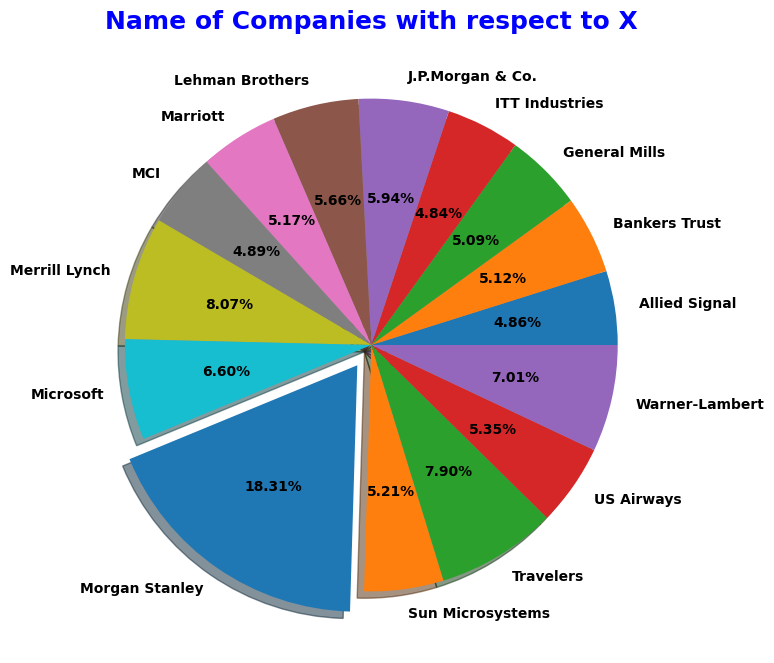

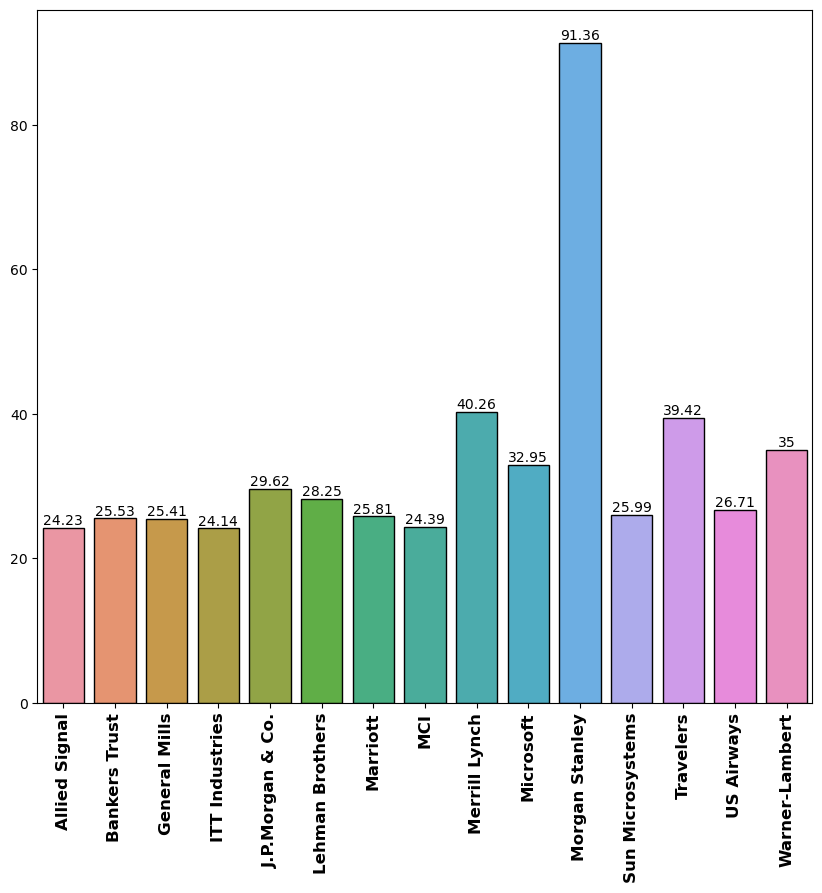

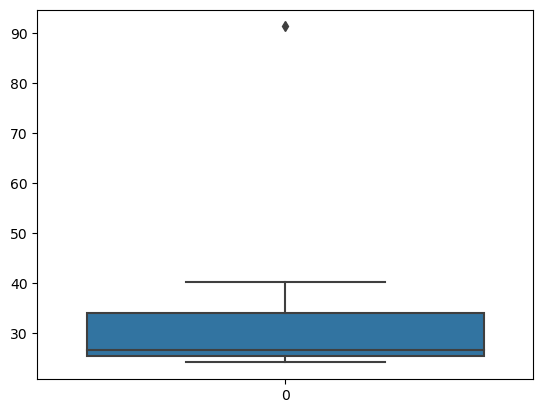

First Quantile= 25.47 Second Quantile= 26.71 Third Quantile= 33.975 Inter-Quartile Range= 8.505000000000003 Upper Whisker= 46.7325 Lower Whisker= 12.712499999999995
The outlier in the boxplot: 10    91.36
dtype: float64
The outlier in the boxplot: 10    91.36
dtype: float64
count    15.000000
mean     33.271333
std      16.945401
min      24.140000
25%      25.470000
50%      26.710000
75%      33.975000
max      91.360000
dtype: float64
Variance= 287.1466123809524


In [2]:
measure_x = [24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00]
name_of_company = ['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.','Lehman Brothers',
      'Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways',
      'Warner-Lambert']
plt.figure(figsize = (8,8))
plt.pie(measure_x, labels = name_of_company, autopct= '%.2f%%',shadow = True,
        explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0],
        textprops = {'size':'medium',
                   'fontweight':'bold',
                   'color':'black'})
plt.title('Name of Companies with respect to X', fontsize = 18, fontweight = 'bold', color='b')
plt.savefig('Question1piechart.png')
plt.show()
plt.figure(figsize = (10,9))
ax = sns.barplot(y = measure_x, x = name_of_company, edgecolor='black')
plt.xticks(rotation = 90, fontsize = 12, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
sns.boxplot(measure_x)
plt.savefig('question1boxplot.png')
plt.show()
measure_x=pd.Series(measure_x)
Q1 = np.quantile(measure_x,0.25)
Q3 = np.quantile(measure_x,0.75)
med = np.median(measure_x)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1, 'Second Quantile=', med, 'Third Quantile=', Q3,
      'Inter-Quartile Range=', IQR, 'Upper Whisker=', upper_bound, 'Lower Whisker=', lower_bound)
Outliers = measure_x[(measure_x <= lower_bound) | (measure_x >= upper_bound)]
print('The outlier in the boxplot:',Outliers)
Outliers = measure_x[(measure_x >= upper_bound)]
print('The outlier in the boxplot:',Outliers)
print(measure_x.describe())
print("Variance=",measure_x.var())

In [3]:
#set2
"""the serving work will began after 10 min of drop off so 45+10 
which will now take more than the usual time so new mew is 55 minutes 
and the porbbaility that it will take more than 1 hour to complete"""
mew = 55
std = 8
q1 = stats.norm.sf(60, loc = mew, scale = std)
print("""The probability that the service manager cannot meet his 
      commitment is""",np.round(q1,5))

The probability that the service manager cannot meet his 
      commitment is 0.26599


In [4]:
mean = 38
std1 = 6
q2_lessthan_38 = stats.norm.cdf(38, loc = mean, scale = std1)


q2_less_than_44 = stats.norm.cdf(44, loc = mean,  scale = std1)


q2_betweeen_38_and_44 = (q2_less_than_44 - q2_lessthan_38)
print('The probability of employee age betweeen 38 and 44 is',np.round(q2_betweeen_38_and_44*100,2),'%') 

q2_morethan_44 = 1-stats.norm.cdf(44, loc = mean, scale = std1)
print('The probability of employee age more than 44 is',np.round(q2_morethan_44*100,2),'%')

true_or_false = (q2_morethan_44 > q2_betweeen_38_and_44)
print('Answer:',true_or_false)

q2b = stats.norm.cdf(30, loc = mean, scale = std1)
print("""A training program for employees under the age of 30 at the center would be expected to attract about"""
      ,np.round((q2b*400),0),'employees')

The probability of employee age betweeen 38 and 44 is 34.13 %
The probability of employee age more than 44 is 15.87 %
Answer: False
A training program for employees under the age of 30 at the center would be expected to attract about 36.0 employees


QQQ-(4)
Let X ~ N(100, 202). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99.

A.90.5, 105.9
B.80.2, 119.8
C.22, 78
D.48.5, 151.5
E.90.1, 109.9

In [5]:
# Given
mew = 100
std = 20
# p(a<x<b)
#To Find = 
""" two values, a and b, symmetric about the mean, such that the 
probability of the random variable taking a value between them is 0.99""" 
# Solution
""" From the above details,we have to exclude .005% area from each
left and right tails. Hence, we want to find the .005th and the 
.995th percentiles Z score values"""

# Z value for .005 percentiles 
z_005_ = np.round(stats.norm.ppf(0.005),4)
z_005_

# Z value for .99 percentiles 
z_99_ = np.round(stats.norm.ppf(0.995),4)
z_99_

#z = (x_bar - mew) / std
#x_bar = (z*std) + mew
a = np.round((z_005_*std) + mew,1)
b = np.round((z_99_*std) + mew,1)
print("""The two values of a and b, symmetric about the mean, 
      are such that the probability of the random variable 
      taking a value between them is 0.99:""",a,b)

The two values of a and b, symmetric about the mean, 
      are such that the probability of the random variable 
      taking a value between them is 0.99: 48.5 151.5


Question   ==
5.Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42) respectively. Both the profits are in USD Million. Answer the following questions about the total profit of the company in Rupees. Assume that 1USD = Rs. 45

In [6]:
# Combine Mean Profit of both division for Company= mean1 + mean2
mean1 = 5
mean2 = 7
Mean = (mean1+mean2) # 1 USD = 45 rupees
print('The Mean Profit of both division:',Mean, 'Million$')
print('The Mean Profit of both division:',(Mean*45)/10, 'Crore Rupees')

# Combine standard Deviation = (Std1^2 + Std2^2)^1/2
std1 = 3**2
std2 = 4**2
Std = np.sqrt(std1 + std2)
print('The Standard Deviation of both division:', Std, 'Million$')
print('The Standard Deviation of both division:', (Std*45)/10, 'Crore Rupees')

The Mean Profit of both division: 12 Million$
The Mean Profit of both division: 54.0 Crore Rupees
The Standard Deviation of both division: 5.0 Million$
The Standard Deviation of both division: 22.5 Crore Rupees


In [7]:
r1, r2 = np.round(stats.norm.interval(0.95, Mean, Std),2)
print('Rupee Ranges from',r1,'to',r2,'Million$ in Annual profit of the Company 95% of the time')
print('Rupee Ranges from',np.divide(np.multiply(r1,45),10),'to',np.divide(np.multiply(r2,45),10),'Crore Rupees in Annual profit of the Company 95% of the time')

Rupee Ranges from 2.2 to 21.8 Million$ in Annual profit of the Company 95% of the time
Rupee Ranges from 9.900000000000002 to 98.1 Crore Rupees in Annual profit of the Company 95% of the time


# B. Specify the 5th percentile of profit (in Rupees) for the company

In [8]:

Z_05_ = stats.norm.ppf(0.05)
Fifth_percentile = (Z_05_ * Std) + Mean
print('The 5th percentile of Profit for the company is',np.round(Fifth_percentile,2),'Million$')
print('The 5th percentile of Profit for the company is',np.round((Fifth_percentile*45)/10,),'Crore Rupees')

The 5th percentile of Profit for the company is 3.78 Million$
The 5th percentile of Profit for the company is 17.0 Crore Rupees


# C. Which of the two divisions has a larger probability of making a loss in a given year?

In [10]:
# The probability of Division #1 making a loss
print('The Probability of Division #1 making a loss is',np.round((stats.norm.cdf(0,5,3))*100,2),'%')

# The probability of Division #2 making a loss
print('The Probability of Division #2 making a loss is',np.round((stats.norm.cdf(0,7,4))*100,2),'%')

Division_1 = (stats.norm.cdf(0,5,3))*100
Division_2 = (stats.norm.cdf(0,7,4))*100

if Division_1>Division_2:
    print('The Division 1 has a larger Probability of making a loss')
else:
          print('The Division 2 has a larger Porbability of making a loss')

The Probability of Division #1 making a loss is 4.78 %
The Probability of Division #2 making a loss is 4.01 %
The Division 1 has a larger Probability of making a loss


# SET3

Question 5
In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.
If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?
Ans

null_hypothesis >= 5%
alternate hypothesis < 5%

In [11]:
p_hat = .046
p = .05
n = 2000

# z_score = p_hat-p/(p(1-p)/n)**0.5
z_score = (p_hat-p)/(np.sqrt((p*(1-p))/n))
z_score

p_value = stats.norm.sf(0.821)
p_value

0.20582313410777142

In [12]:
if p_value>0.05:
    print("""No: Microsoft could not conclude that Mozilla has a less
    than 5% share of the market even if the sample were 
    based on 2,000 users""")
else:
    print("Yes")

No: Microsoft could not conclude that Mozilla has a less
    than 5% share of the market even if the sample were 
    based on 2,000 users


# Set 4

Question 3
Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been 50 USD with a standard deviation of 40 USD. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between 45 USD and 55 USD. What is the probability that in any given week, there will be an investigation?

In [13]:
mean = 50
std = 40
n = 100
d_f = 100 - 1 #degree of freedom
#the probability that there will be an investigation,
#if the mean transactions amount increases more than 55 USD or less than 45 USD
# no investigation if the mean transactions amount remains between 45 to 55 USD

# we will go for t-distribution as population standard deviation is unknown
t_forty_five = (45-50)/(40/np.sqrt(100))

t_fifty_five = (55-50)/(40/np.sqrt(100))

forty_five = stats.t.cdf(t_forty_five, df = d_f)

fifty_five = stats.t.cdf(t_fifty_five, d_f)

prob = fifty_five - forty_five

np.round(stats.t.interval(alpha = prob, df = d_f, loc = mean, scale = std/np.sqrt(n)),)

print('The probability that in any given week, there will be an investigation is',np.round((1-prob)*100,1),'%')

The probability that in any given week, there will be an investigation is 21.4 %


In [14]:
x_bar = 45
s_std = 40
mew = 50

t = np.round(stats.t.ppf(0.025, df = 249),2)
t

# t_value = (x_bar - mew)/(sample_std/n**0.5)
# t = 45-50 or z = 55-50 z = +/- 5

# t = 5/(40/n**0.5)
# n = (sample_standard_deviation*tscore)/(sample_mean=population_mean)
n = ((s_std*abs(t)) / (5))**2

print('The Auditors would like to maintain the probability of investigation to 5%, they should sample',np.round(n,),'transactions if they do not want to change the thresholds of 45 to 55')

df= n-1
print(n, df)

np.round(stats.t.interval(alpha = 0.95, df = df, loc = mew, scale = s_std/np.sqrt(n)),)

The Auditors would like to maintain the probability of investigation to 5%, they should sample 248.0 transactions if they do not want to change the thresholds of 45 to 55
248.3776 247.3776


array([45., 55.])